In [1]:
#Import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Generating inputs
X = [(i,2*i) for i in range(500)]
#Generating outputs
Y = [(i + 2*i + 1) for i in range(500)]
#Converting to numpy arrays to support efficient operations
X = np.asarray(X)
Y = np.asarray(Y)

In [4]:
#Splitting into train and test data
X_train = X[0:400,:]
Y_train = Y[0:400]
X_test = X[400:,:]
Y_test = Y[400:]

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [6]:
#Batch Size
batch_size = 50
#Number of batches
num_batches = int(len(X_train)/batch_size)
num_batches

8

In [7]:
#Weights and bias intitialization
w = np.random.uniform(size = (1,3))
w

array([[ 0.40977731,  0.50479349,  0.22971408]])

In [8]:
#Computing output
def output(x,w):
    return np.add(np.matmul(w[:,0:2],x.T),w[:,2])

In [9]:
#Comnputing loss
def losses(output, y):
    return np.square(output - y.T).mean()

In [10]:
#List to store loss values on each training batch
loss_values = []
#Sum of losses for batches
loss_sum = 0.0
#Inital weight gradient
dw = np.zeros(shape = (1,2))
#Initial bias gradient
db = 0.0
#Learning rate
learning_rate = 1e-9
#Number of epochs
n_epochs = 75
#Batch indexing
ind = 0
#Loss per epoch
loss_epoch = []

In [11]:
#Training
for i in range(n_epochs):
    for _ in range(num_batches):
        #Splitting data into batches
        X_batch = X_train[ind:ind + batch_size,:]
        Y_batch = Y_train[ind:ind + batch_size]
        #Computing output for batch
        h = output(X_batch,w)
        #Evaluating loss and adding to the batch sum
        loss = losses(h,Y_batch)
        loss_sum += loss
        #Computing weight gradient 
        dw = np.matmul((h - Y_batch.T),X_batch)
        #Computing bias gradient
        db = (h - Y_batch.T).mean()
        #Updating weights
        w[:,0:2] -= learning_rate*dw
        #Updating bias
        w[:,2] -= learning_rate*db
        #Setting ind to starting index of next batch
        ind += batch_size
    #Computing average loss per epoch
    average_loss = loss_sum/num_batches
    #Appending average loss to list of loss per epoch
    loss_epoch.append(average_loss)
    print("Loss at epoch {}: {:5.1f}".format(i+1,average_loss))
    #Resetting sum and average
    loss_sum = 0.0
    average_loss = 0.0
    #Resetting ind for next epoch
    ind = 0
        
#Testing
#Compute output
h = output(X_test, w)
#Compute loss
loss = losses(h, Y_test)
print("Loss at test time : {}".format(loss))
print("Final weights : ",w)

Loss at epoch 1: 122754.2
Loss at epoch 2: 98996.4
Loss at epoch 3: 79836.8
Loss at epoch 4: 64385.3
Loss at epoch 5: 51924.3
Loss at epoch 6: 41875.0
Loss at epoch 7: 33770.6
Loss at epoch 8: 27234.8
Loss at epoch 9: 21963.9
Loss at epoch 10: 17713.1
Loss at epoch 11: 14285.0
Loss at epoch 12: 11520.4
Loss at epoch 13: 9290.9
Loss at epoch 14: 7492.8
Loss at epoch 15: 6042.8
Loss at epoch 16: 4873.3
Loss at epoch 17: 3930.2
Loss at epoch 18: 3169.7
Loss at epoch 19: 2556.3
Loss at epoch 20: 2061.6
Loss at epoch 21: 1662.7
Loss at epoch 22: 1341.0
Loss at epoch 23: 1081.5
Loss at epoch 24: 872.2
Loss at epoch 25: 703.5
Loss at epoch 26: 567.4
Loss at epoch 27: 457.6
Loss at epoch 28: 369.1
Loss at epoch 29: 297.7
Loss at epoch 30: 240.1
Loss at epoch 31: 193.7
Loss at epoch 32: 156.3
Loss at epoch 33: 126.1
Loss at epoch 34: 101.7
Loss at epoch 35:  82.1
Loss at epoch 36:  66.2
Loss at epoch 37:  53.4
Loss at epoch 38:  43.1
Loss at epoch 39:  34.8
Loss at epoch 40:  28.1
Loss at epoch

Text(0,0.5,'Loss per epoch')

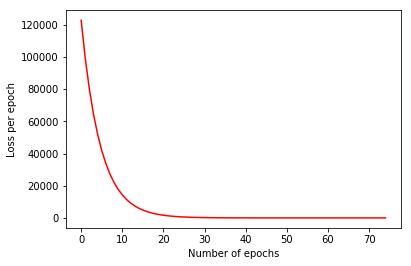

In [13]:
plt.plot(list(range(n_epochs)),loss_epoch,'-r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss per epoch")

# Key Notes

An interesting thing to note in this program is the learning rate. It is kept unsually small. The reason for the small learning rate is influenced by weights initialization. The weights are initialized in a range close to what the actual real weights should be. Thus, only very tiny updates are needed over time to reach the goal. Interestingly, if the learning rate is 1e-8, then the network drastically converges. Any higher learning rate like say 1e-6 provides to much energy to the system that the values just overshoot. 

One can try different learning rates to witness some interesting plots.